#Work description

In this initial phase of our project, we delve into the dataset using the powerful data manipulation capabilities of pandas and the visualization prowess of seaborn. This notebook primarily focuses on understanding the structure and characteristics of our data.

#About the dataset

**AUTOMPG**: *Mileage per gallon performances of various cars*

The data is technical specification of cars. The dataset is downloaded from UCI Machine Learning Repository. It concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Source Origin**: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Attribute Information**

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete

**Key Points about MPG and how values could be interpreted**

MPG stands for "Miles Per Gallon." It is a measure of fuel efficiency used primarily in the United States to indicate how many miles a vehicle can travel on one gallon of fuel. The higher the MPG value, the more fuel-efficient the vehicle is, meaning it can travel further on less fuel.

* **Miles**: Represents the distance traveled.
* **Per Gallon**: Represents the amount of fuel used.
* **Calculation**: If a car has an MPG of 30, it means that the car can travel 30 miles on one gallon of fuel.
* **Importance**:
  * **Fuel Efficiency**: Higher MPG values indicate better fuel efficiency, which can save money on fuel costs and is better for the environment due to reduced emissions.
  * **Cost-Effectiveness**: Vehicles with higher MPG ratings are generally cheaper to operate over time.
  * **Environmental Impact**: More fuel-efficient vehicles typically produce fewer greenhouse gas emissions.

**Work Steps**

We have imported all the packages and libraries we will be using for the initial exploration of data. Our work will be split into the following steps:

1. Loading and describing the data
2. Cleaning the dataset
3. Univariate analysis
4. Bi-variate analysis
5. Multivariate analysis
6. Conclusion




In [1]:
from __future__ import absolute_import, print_function, division
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

sns.set_theme(style="whitegrid", palette="pastel")

%matplotlib inline
import missingno as mno
from scipy import stats


#Task 1: Loading and describing the data

In [2]:
dataset_path= 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']


In [5]:
dataset_raw= pd.read_csv(dataset_path, names=column_names, na_values='?', comment= "\t", sep=" ", skipinitialspace=True )

In [6]:
dataset_raw.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
dataset_raw.shape

(398, 8)

In [8]:
dataset= dataset_raw.copy()

 **Describing the data**



In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Task 2 : Clean the data

In [11]:
#Checking the missing values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<Axes: >

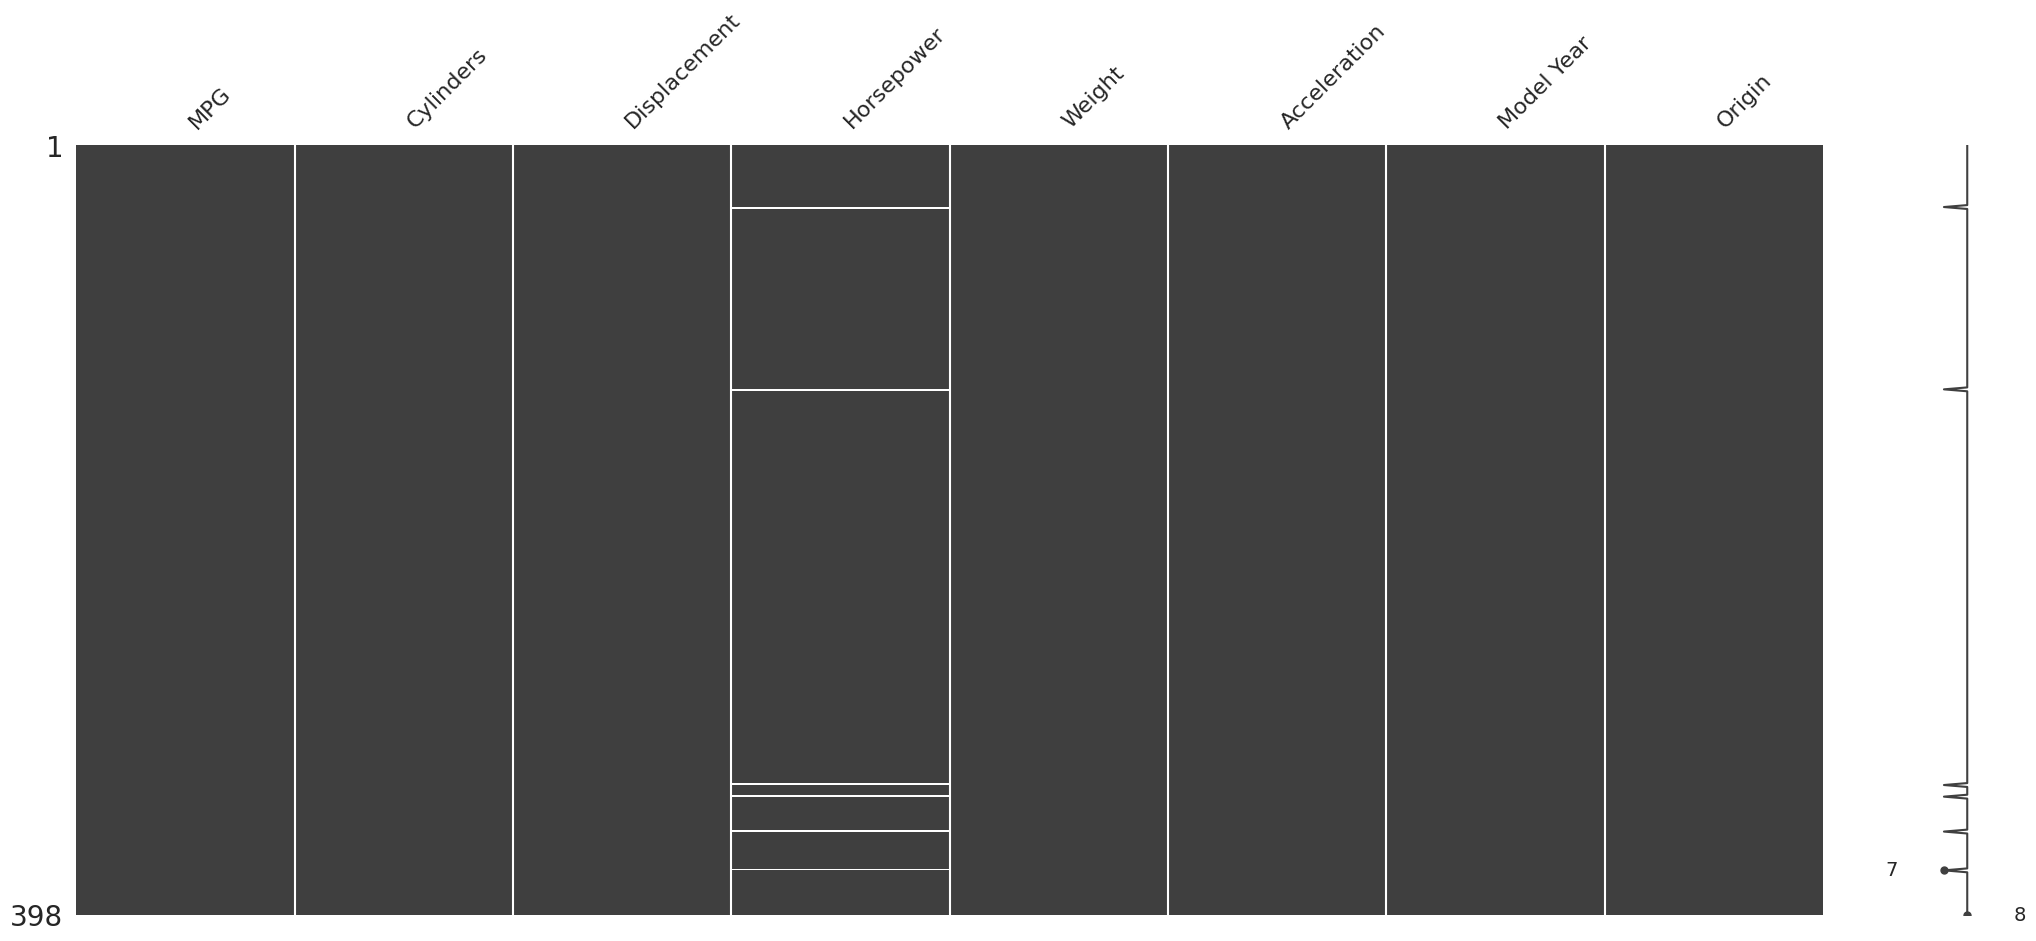

In [12]:
#Further Checking of the missing values.
mno.matrix(dataset)


There is only 6 examples have missing values of Hoursepower.  Removing them will not significantly affect the overall statistics of the dataset. In fact, the dataset contains 398 examples, removing 6 represents about 1.5% of the total, which is negligible. Moreover, imputing these missing values (replacing them with the mean, median, or another estimator) can introduce bias into the model, especially if the missing values are not randomly distributed. In general, for many machine learning algorithms, the model's performance may not be significantly affected by removing a small number of examples. In contrast, poor handling of missing values (e.g., incorrect imputation) can have a more negative impact.

In [13]:
#Dropping the examples missing 'Horspower' values
df_clean = dataset.dropna(subset=['Horsepower'])

In [14]:
#The shape of the cleaned data
df_clean.shape

(392, 8)

In [15]:
#The description of the cleaned data
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


# Task 3 : Univariate Analysis

We will be analyzing individual variables one at a time, mainly the MPG variable and ordinal variable (Origin, Cylinders, Model Year)

**Inspecting the data distribution of MPG**

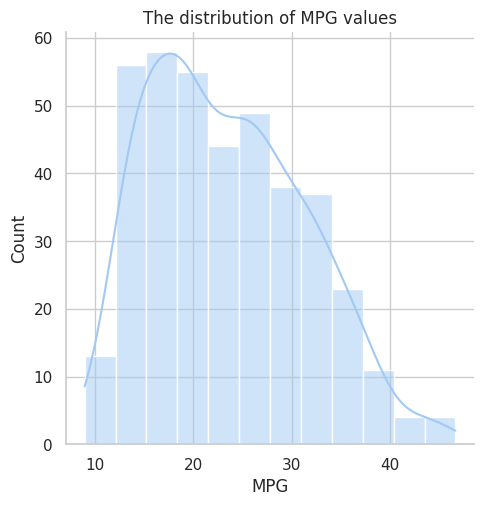

In [16]:
sns.displot(df_clean.MPG, kde=True)
plt.title("The distribution of MPG values")
plt.show()

5. **Checking the statistical properties of the MPG distribution**

In [17]:
#Computing the Sknewss and Kurtosis of MPG data distribution
print("Skewness: %f" % df_clean['MPG'].skew())
print("Kurtosis: %f" % df_clean['MPG'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993




**KURTOSIS**: describes heaviness of the tails of a distribution

Normal Distribution has a kurtosis of close to 0. If the kurtosis is > zero, then distribution has heavier tails. If the kurtosis is < zero, then the distribution is light tails.
=> The Kurtosis of the MPG distribution is negative showing a light tail. The dataset doesn't contain significant outliers.

**SKEWNESS**:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is <-1 or > 1, the data are highly skewed.
=>The skewness in the case of MPG distribution is positive and less that 0.5, asserting that the data distribution is fairly symmetrical which could be easily noticed from the distribution plot.


**Normality of distribution of the target variable MPG** We will use D'Agostino's K^2 Test to check the normality of distribution

* P-Value > alpha: fail to reject H0 (normalilty of distribution is asserted).
* P-Value <= alpha: reject H0 (normality of distrution is rejected).

In [18]:
stat, p = stats.normaltest(df_clean.MPG)
print('Statistics : %.3f, p=%.3f ' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics : 20.461, p=0.000 
Data does not look Gaussian (reject H0)


**Exploring the 'Ordinal' features**

The **Origin** is an ordinal feature with discrite values. It is a code that references the country of origin. In this dataset, code '1' corresponds to USA, '2' to Europe, and '3' stands for Japan

In [19]:
df_clean['country_name']=df_clean.Origin.map({1:'USA', 2:'EUROPE', 3:'JAPAN'})
df_clean['country_name'].value_counts().reset_index()

,country_name,count
0,USA,245
1,JAPAN,79
2,EUROPE,68


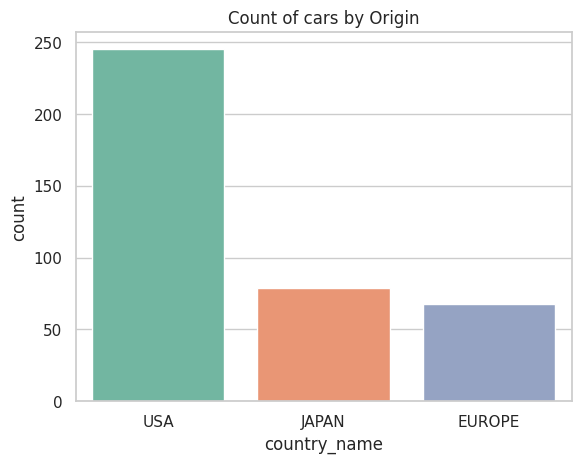

In [20]:
g=sns.countplot(x=df_clean['country_name'], palette='Set2')
plt.title("Count of cars by Origin")
plt.show()

=> Most of the cars data are originated from the USA

The 'Model Year' is also an ordinal feature having discret values. We will be examining how many distinct auto models are present in this dataset





In [21]:
print("Number of unique models : ", len(df_clean['Model Year'].unique()))

Number of unique models :  13


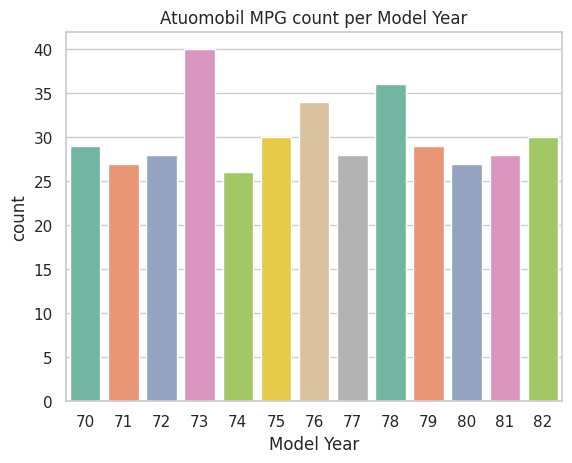

In [22]:
sns.countplot(x=df_clean['Model Year'], palette='Set2')
plt.title("Atuomobil MPG count per Model Year")
plt.show()

=> Cars from different 'Model Years' are approximately equally represented in the dataset, with a slightly higher number of 1973 models.

The 'Cylinders' is also an ordinal feature having discret values. We will be examining how many distinct types of Cylinder are present in this dataset



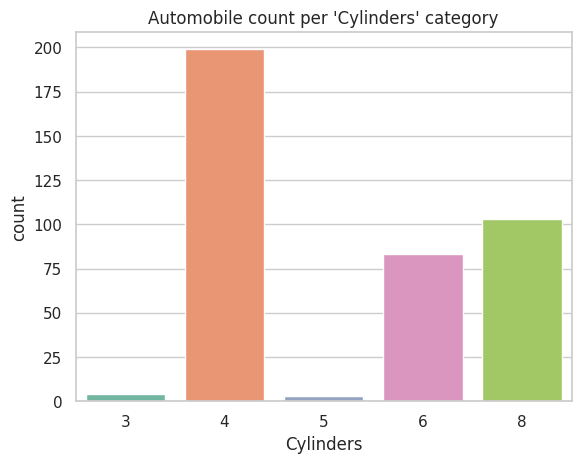

In [23]:
sns.countplot(x=df_clean['Cylinders'], palette='Set2')
plt.title("Automobile count per 'Cylinders' category")
plt.show()

4-cylinder cars are the most dominant model in the dataset, likely due to their fuel efficiency, cost-effectiveness, and widespread popularity worldwide.

#Task 3 : Bi-variate Analysis

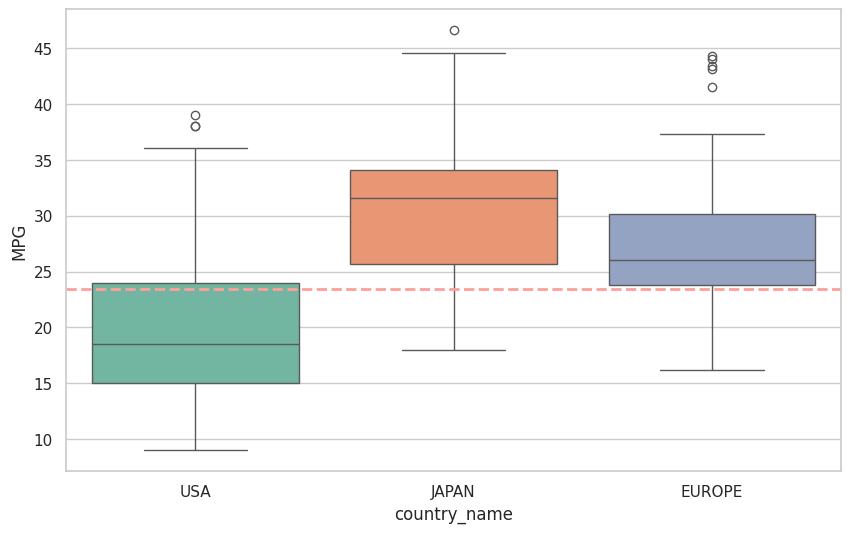

In [24]:
#distribution of MPG per Origin
fig = plt.figure(figsize=(10,6))
sns.boxplot(y=df_clean.MPG, x='country_name', data=df_clean, palette="Set2")
plt.axhline(df_clean.MPG.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()



The red line marks the average of the MPG accross the different origins. From the above plot we can observe:

* Majority of the cars from USA (almost 75%) have MPG **below** global average.
* Majority of the cars from Japan and Europe have MPG **above** global average.

These values indicate that cars from Japan and Europe tend to be more fuel-efficient than cars from USA.

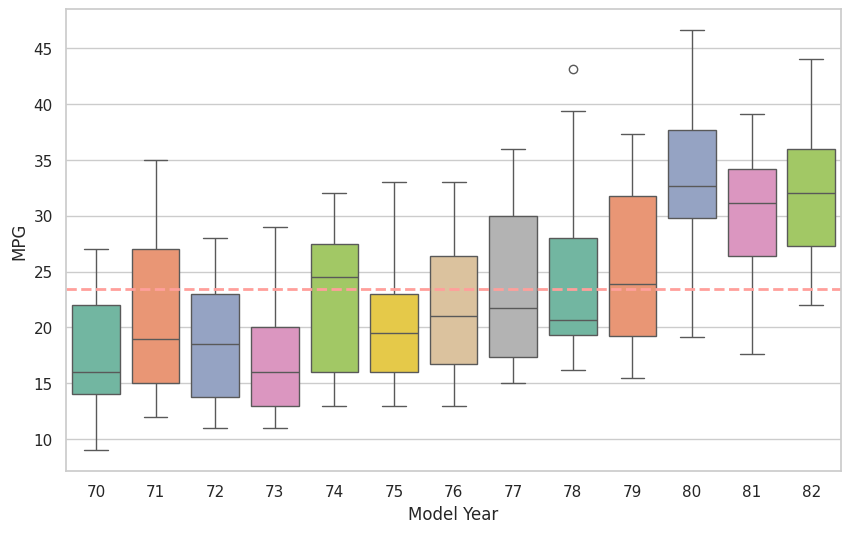

In [25]:
#distribution of MPG per Model Year
fig = plt.figure(figsize=(10,6))
sns.boxplot(y=df_clean.MPG, x='Model Year', data=df_clean, palette="Set2")
plt.axhline(df_clean.MPG.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()

The plot shows that all the recent car models from 1980, 1981, and 1982 have MPG values above the average MPG of older models. This suggests a significant improvement in automotive technology, leading to increased fuel efficiency in newer models. These advancements may be attributed to stricter fuel economy regulations, innovations in engine design, and a growing emphasis on environmental sustainability. We can also notice that the 1970, 1972 and 1973 models are the most fuel consumming cars with more than 75% of them having thier MPG below the average MPG of other models.

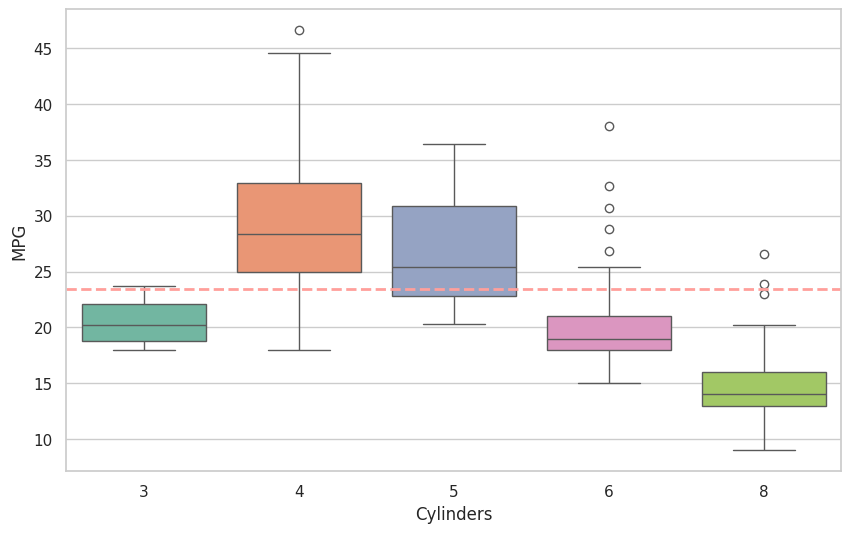

In [26]:
#distribution of MPG per Cylinders
fig = plt.figure(figsize=(10,6))
sns.boxplot(y=df_clean.MPG, x='Cylinders', data=df_clean, palette="Set2")
plt.axhline(df_clean.MPG.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()

According to the plot most cars with 4 or 5 cylinders have thier MPG above the average values of other models. This confirms our previous assumption. The 4-5 cylinders cars are the most fuel-efficient models meaning it can travel further on less fuel. Their cost-effectiveness have made these models popular among consumers. On the other hand, we can notice as the number of cylinders increases, 6 and 8, MPG tends to decrease. This makes sense since cars with more cylinders usually consume more fuel. The dataset also reveals that cars with 3-cylinder engines have the lowest MPG, falling below the average of other models. This can be attributed to several factors, including the increased workload on smaller engines to deliver adequate power, the absence of modern fuel-saving technologies in older models, and the frequent use of these vehicles in city driving conditions, which are less fuel-efficient.

**Studying the relationship between the target variable MPG and the other variables**

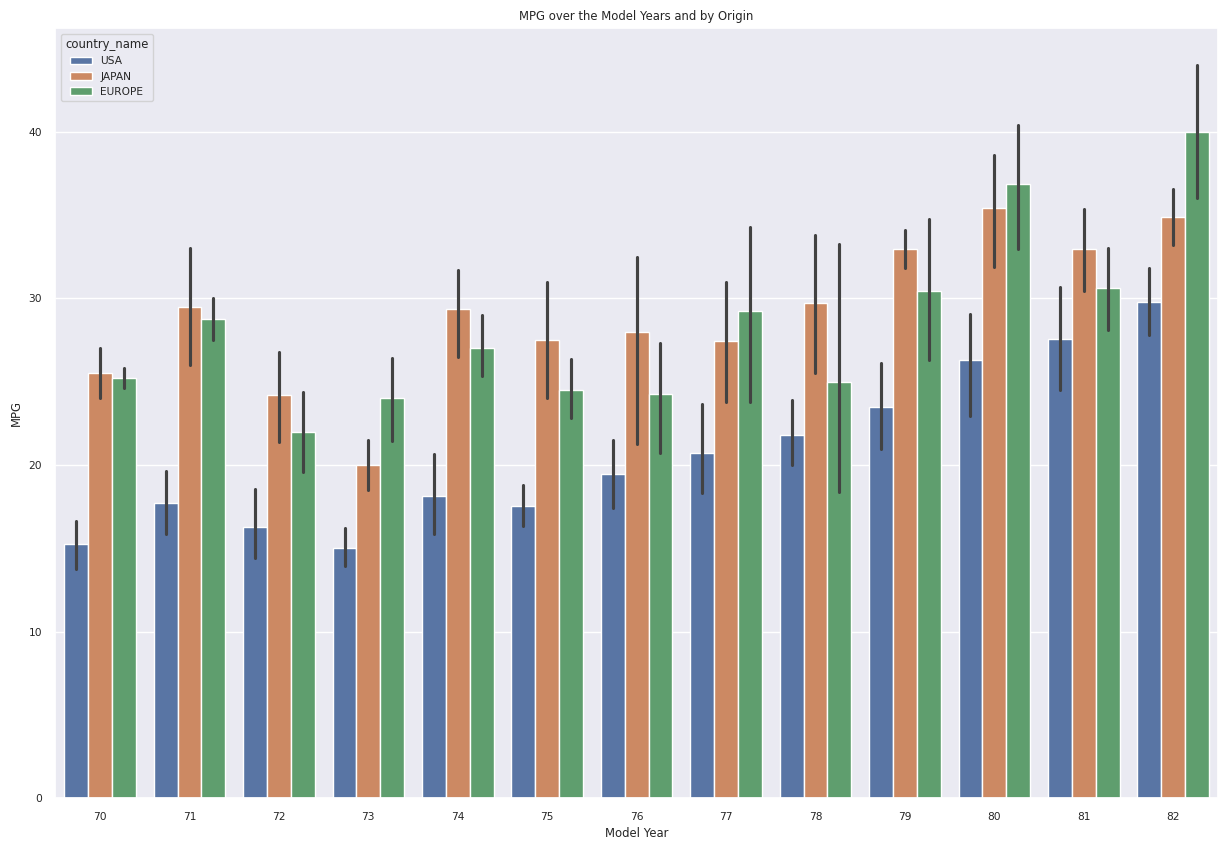

In [27]:
## plot the MGE vs. Model Year for each origni
sns.set(font_scale=0.7)
plt.figure(figsize=[15,10])
sns.barplot(x='Model Year', y='MPG', hue='country_name', data=df_clean)
plt.title("MPG over the Model Years and by Origin")
plt.show()

This plot reveals that during the 1970s, Japanese cars led in fuel efficiency, boasting the highest average MPG compared to other regions. However, from the 1980s onward, European cars took the lead, demonstrating significant advancements in fuel efficiency, particularly notable in the models from 1980 and 1981.

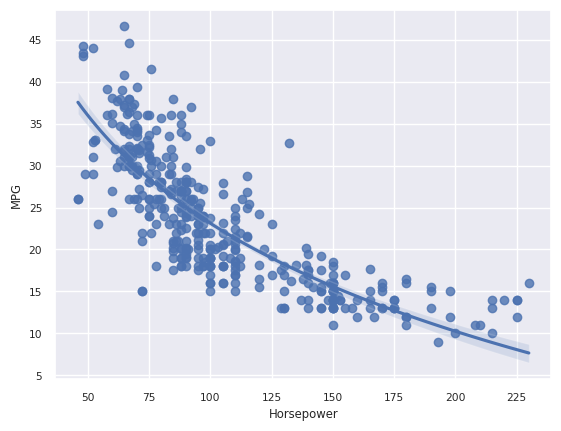

In [30]:
#Fit a log-linear regression between Horsepower and MPG values:
plot = sns.regplot(x='Horsepower',y='MPG',data=df_clean, logx=True)
plt.show()

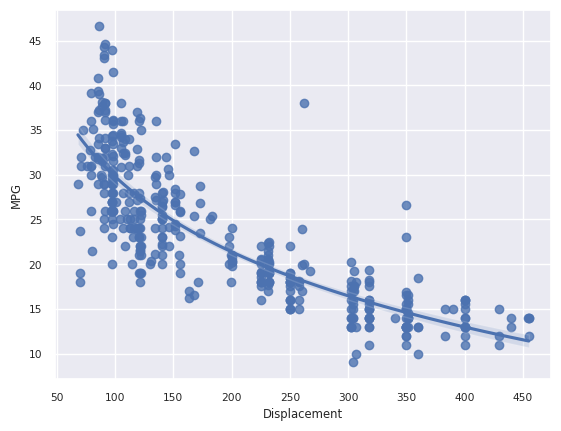

In [31]:
#Fit a log-linear regression between Displacement and MPG values:
plot = sns.regplot(x='Displacement',y='MPG',data=df_clean, logx=True)
plt.show()

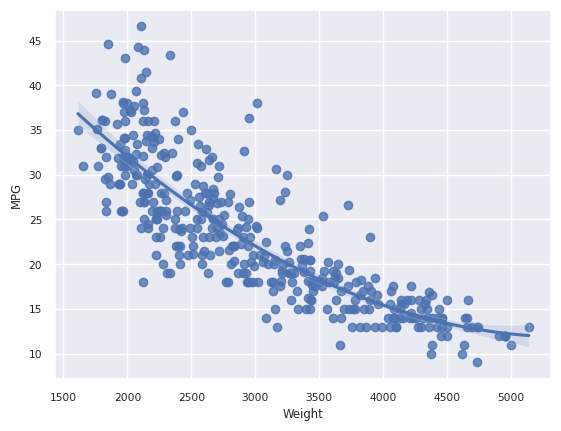

In [42]:
#Fit a higher-order polynomial regression to capture nonlinear trends:
plot = sns.regplot(x='Weight',y='MPG',data=df_clean, order=2)
plt.show()

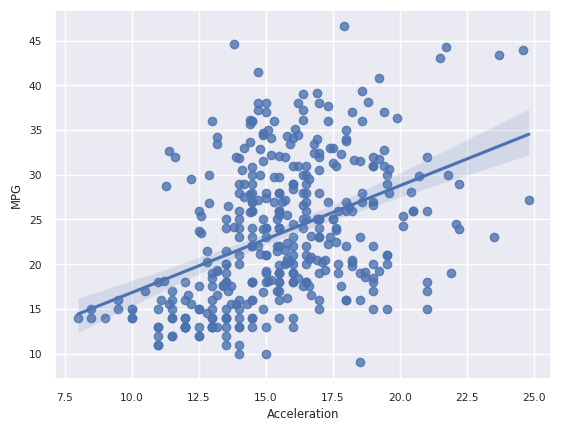

In [51]:
#Fit liner regression to capture the relation:
plot = sns.regplot(x='Acceleration',y='MPG',data=df_clean)
plt.show()

# Taks 4: Multi-variate Analysis

Exploring the relationships between the variables using seaborn pairplot. We  exclude from this visualization the ordinal variables (origin, cylinders, Model Year)

<Figure size 1200x600 with 0 Axes>

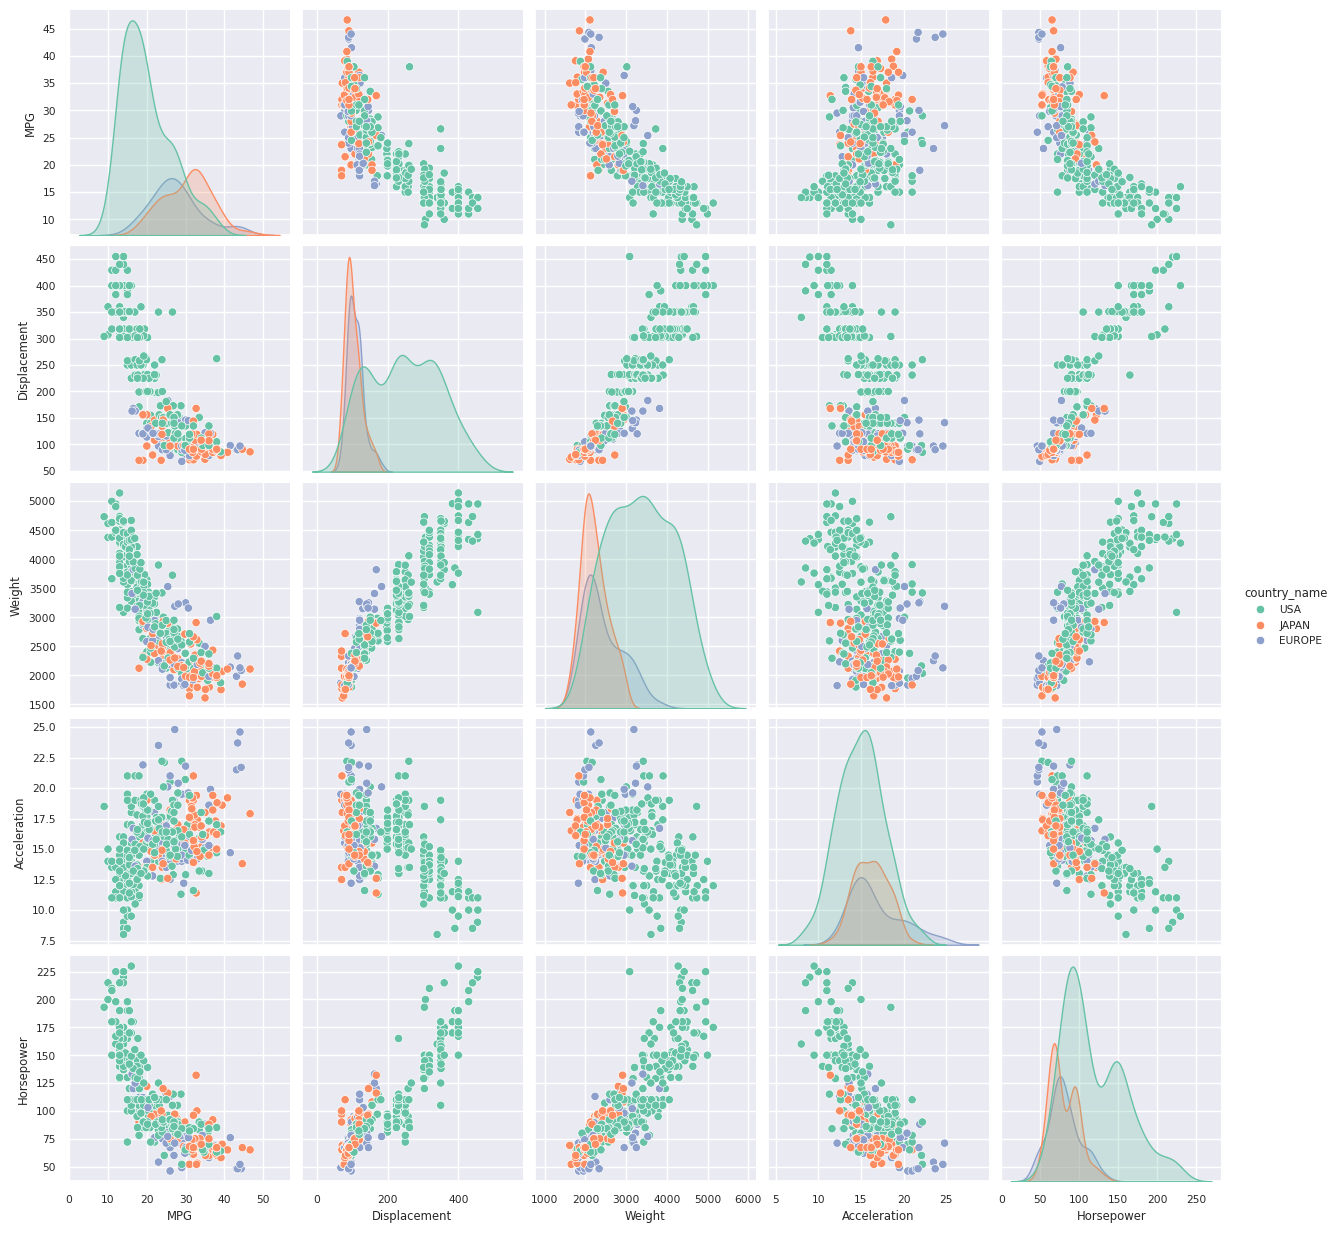

In [39]:
df= df_clean[['MPG', 'Displacement', 'Weight', 'Acceleration', 'Horsepower', 'country_name']]
plt.figure(figsize=(12,6))
sns.pairplot(data=df, diag_kind="kde", hue='country_name', palette='Set2', )
plt.show()

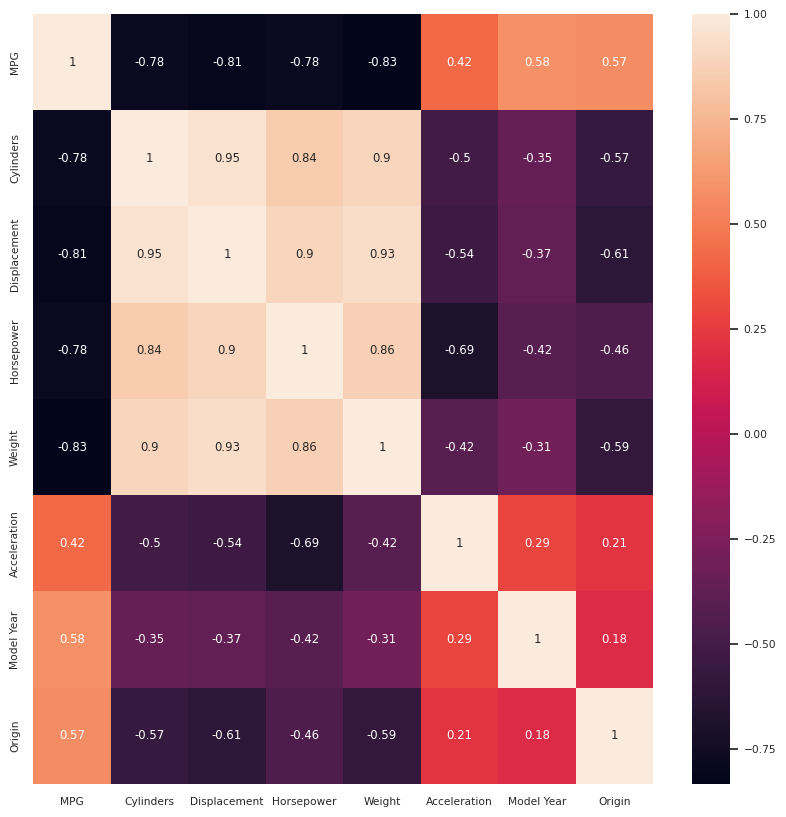

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clean.drop('country_name', axis=1).corr(), annot=True)
plt.show()

**Interprating the Correlation with the target variable MPG**

1. Cylinders (-0.78): Strong negative correlation.
  - As the number of cylinders increases, MPG tends to decrease.
  - This makes sense since cars with more cylinders usually consume more fuel.

2. Displacement (-0.81): Strong negative correlation.
  - Higher engine displacement is associated with lower MPG.
  - Larger engines typically consume more fuel.

3. Horsepower (-0.78): Strong negative correlation.
  - Higher horsepower correlates with lower MPG.
  - More powerful engines generally have higher fuel consumption.

4. Weight (-0.83): Strong negative correlation.
  - Heavier cars tend to have lower MPG.
  - Heavier vehicles require more energy to move.

5. Acceleration (0.42): Moderate positive correlation.
Cars with higher acceleration might have better MPG, possibly because more modern, efficient engines have both better performance and fuel efficiency.

6. Model Year (0.58): Moderate positive correlation.
  - Newer cars tend to have higher MPG.
  - Advances in technology and stricter fuel economy regulations over the years have led to more efficient cars.

7. Origin (0.57): Moderate positive correlation.
This likely reflects differences in car designs and fuel efficiency standards across different regions (e.g., cars from certain countries might be more fuel-efficient).

**Mutlicollinarity**

We can also observe high correlations among features : Cylinders, Weight, Horsepower, Acceleration, Displacement in our dataset. This can have several consequences on our machine learning model, particularly if algorithms we will be using assume independence between features or are sensitive to multicollinearity, such as linear regression. This point will be further investigated when training ML models in the next notebook.

We can try some techniques of feature selection to reduce the multicollinarity effect and evaluate its impact on model performances :
- Remove Redundant Features: I will remove one of the features in each highly correlated pair ('Cylinders' and 'Displacement')
- Principal Component Analysis (PCA): We can also use PCA to reduce the dimensionality of the dataset while preserving as much variance as possible. PCA transforms correlated features into a set of linearly uncorrelated components.